Using TensorFlow backend.


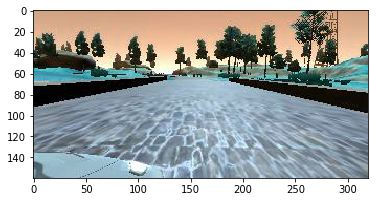

In [1]:
### Import Libraries
import csv
import cv2
import numpy as np
import random
import sklearn
import math

from keras.layers.core import Flatten, Dense, Activation, Lambda, Dropout
from keras.models import Model, Sequential
from keras.layers.convolutional import Convolution2D
#Conv2D
from keras.layers.advanced_activations import ELU
import matplotlib.pyplot as plt
%matplotlib inline


lines=[]
images=[]
measurements = []
throttle=[]
brake=[]
speed=[]
steer=[]
center=[]
X_left=[]
leftl=[]
X_right=[]
rightl=[]
left=[]
right=[]
with open("C://Users/matth/Desktop/data/driving_log.csv") as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
for line in lines:
    source_path = line[0]
    
    filename = source_path.split("\\")[-1]
    current_path = "C://Users/matth/Desktop/data/" + filename
    image=cv2.imread(current_path)
    images.append(image)
    center.append(image)
    
    X_left=line[1]
    filename_left=X_left.split("\\")[-1]
    filename_left=filename_left.strip(" ")
    left_path="C://Users/matth/Desktop/data/"+filename_left
    leftl=cv2.imread(left_path)
    left.append(leftl)
    
    X_right=line[2]
    filename_right=X_right.split("\\")[-1]
    filename_right=filename_right.strip(" ")
    right_path="C://Users/matth/Desktop/data/" + filename_right
    rightl=cv2.imread(right_path)
    right.append(rightl)
    
    measurement=line[3]
    throt=line[4]
    braking=line[5]
    speeding=line[6]
    measurements.append(measurement)
    steer.append(measurement)
    throttle.append(throt)
    brake.append(braking)
    speed.append(speeding)




plt.imshow(right[2])


In [2]:
del center[0]
del right[0]
del left[0]
del measurements[0]
del throttle[0]
del steer[0]
del brake[0]
del speed[0]

## Delete all first elements inside a list. First elements equals columns name

4451.0


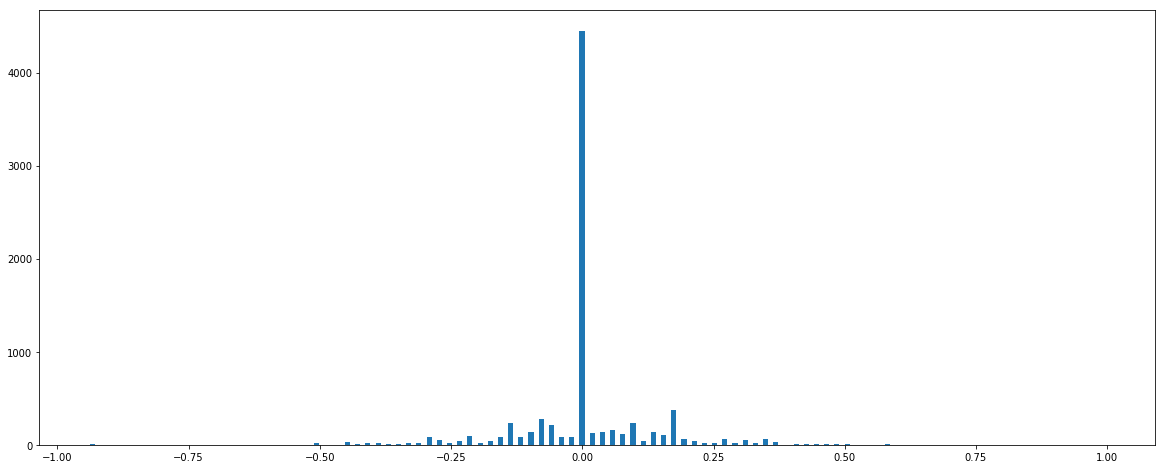

In [3]:
#print((measurements))
meas=[]
sped=[]
brak=[]
throt=[]
plt.figure(figsize=(20,8))
for i in range (1,len(measurements)):
    
    measure=float(measurements[i])
    meas.append(measure)
    
    speede=float(speed[i])
    sped.append(speede)
    
    brakee=float(brake[i])
    brak.append(brakee)
    
    throte=float(throttle[i])
    throt.append(throte)
    

steering_nb=np.arange(len(meas))
#print(len(meas))
k=plt.hist((meas),bins=100,alpha=1,rwidth=0.5)
print(k[0][48])

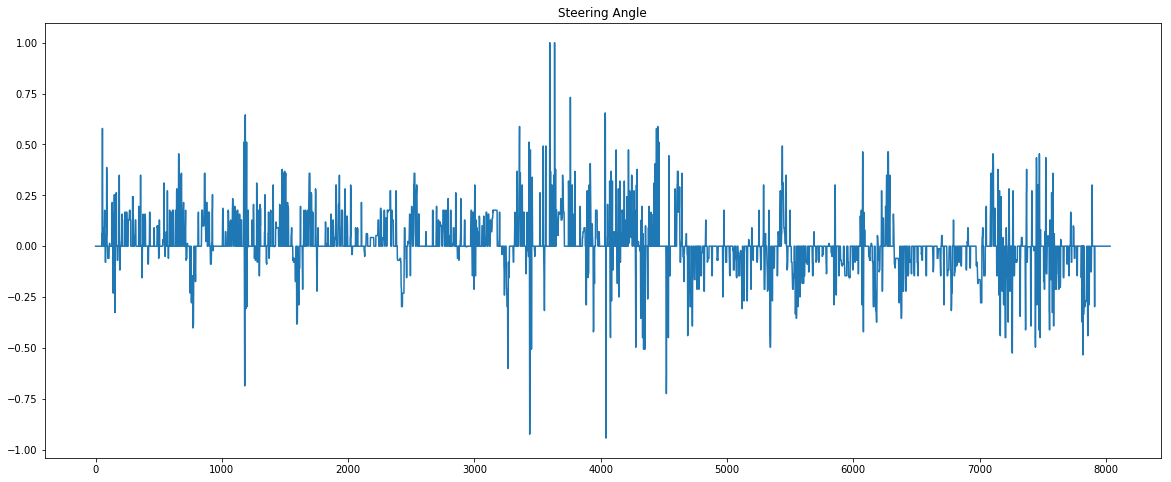

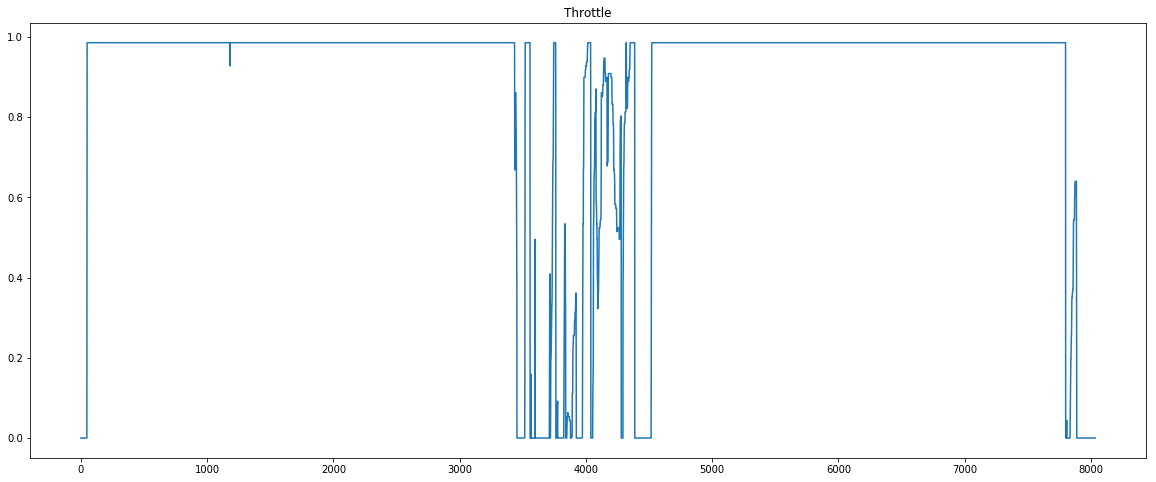

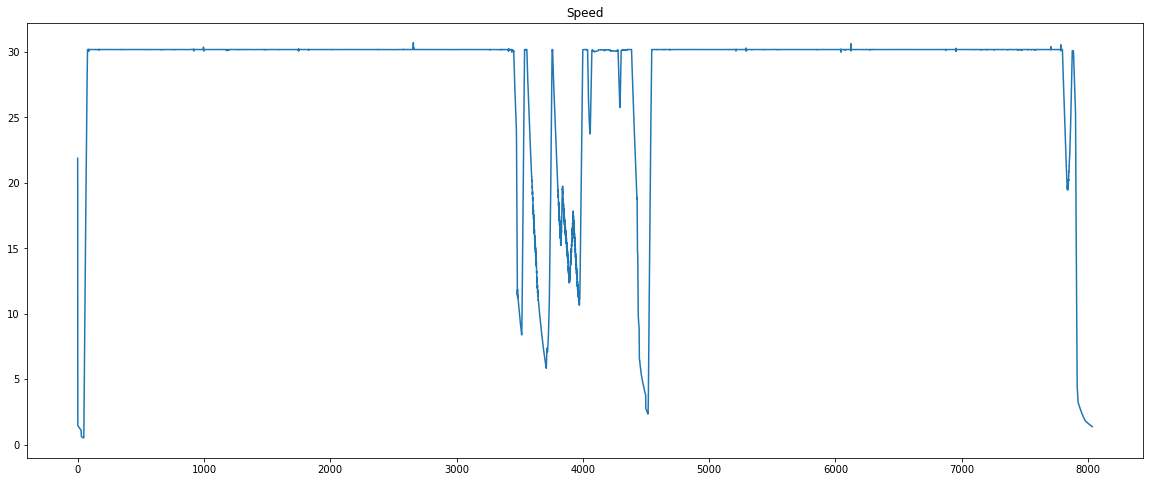

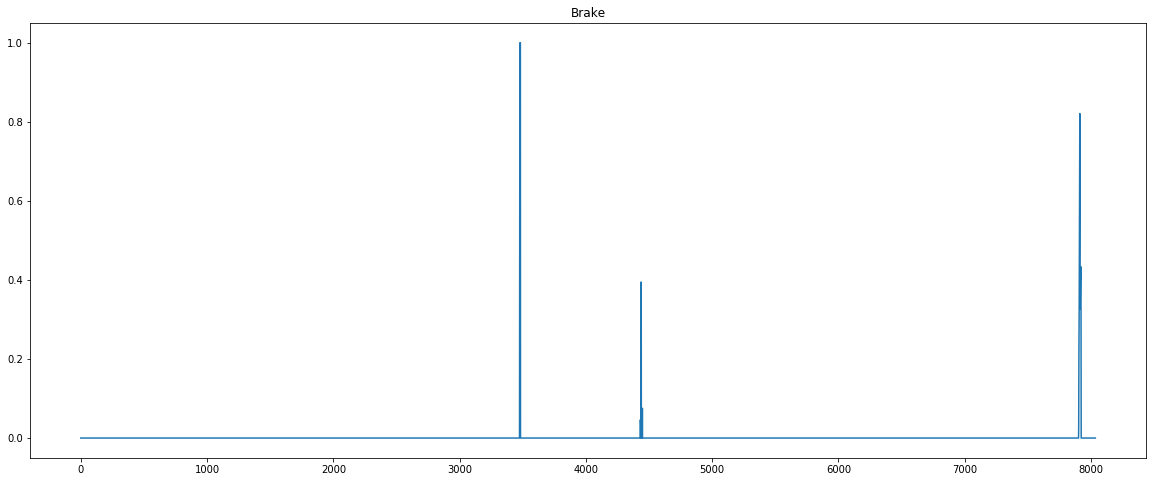

In [4]:





plt.figure(figsize=(20,8))
plt.plot(steering_nb,meas)
plt.title("Steering Angle")

plt.figure(figsize=(20,8))
plt.plot(steering_nb,throt)
plt.title("Throttle")

plt.figure(figsize=(20,8))
plt.plot(steering_nb,sped)
plt.title("Speed")

plt.figure(figsize=(20,8))
plt.plot(steering_nb,brak)
plt.title("Brake")

## Get Index to cut data properly


In [5]:
steerr=[]
counter=0
imgs=[]

indices=[]
index0=[]
index=[]

indi=[]
print(index)
factor=20


## Save all Indices which are related to a steering angle of  zero inside a list
for i in range(len(meas)):
    if meas[i]==0.0:
        indek=len(meas[0:i])
        index0.append(indek)
        
## Save all Indices which are not related to a steering angle of  zero inside a list
for i in range(len(meas)):
    if meas[i] <= -0.01 or meas[i] >=0.01: ### former 0.005
        #print(i)
        imgs.append(images[i])
        ind=len(meas[0:i])
        indices.append(ind)

        
## Concatenate all indices
#indekx=indi+indices
indekx=index0+indices

## delete 1st element of indices list; First entry equals elements name!
del indekx[0]

## plot steering_angle in dependency to indices
#for i in index:
for i in range(len(indekx)):
    angle=meas[indekx[i]]
    steerr.append(angle)

[]


### Get all Indices whereby the steeringangle is greater than zero

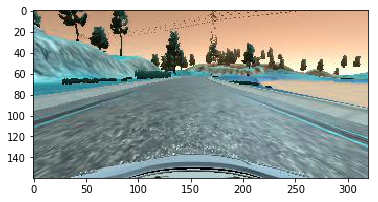

In [6]:
indkp=[]
indkm=[]
stkp=[]
stkm=[]
cent=[]
lefft=[]
righht=[]
steerr=[]

for i in range(len(meas)):
    if meas[i] <= -0.01: ### former 0.005
        #print(i)
        imgs.append(images[i])
        ind=len(meas[0:i])
        indkp.append(ind)
        stkp.append(float(steer[ind]))
    if meas[i] >=0.01:
        imgs.append(images[i])
        ind=len(meas[0:i])
        indkm.append(ind)
        stkm.append(float(steer[ind]))
    
inkk=indkp+indkm
st=stkp+stkm        
plt.hist(stkm,bins=100)

for i in range (len(inkk)):
       
    c=center[inkk[i]]
    r=right[inkk[i]]
    l=left[inkk[i]]
    sss=steer[inkk[i]]
    
    cent.append((c))
    lefft.append((l))
    righht.append((r))
    steerr.append(float(sss))
    
plt.imshow(cent[290])

### Create the new augmented Datavectors

In [7]:
cent_aug=[]
leftt_aug=[]
rightt_aug=[]
steerr_aug=[]
index_augmented=[]
for i in range(len(inkk)):
    ind_aug=len(center)+len(inkk[0:i])
    ind_x=len(index)
    index_augmented.append(ind_aug)

    centlr=np.fliplr(cent[i])
    leftlr=np.fliplr(lefft[i])
    righhtlr=np.fliplr(righht[i])
    steerrlr=steerr[i]
    cent_aug.append(centlr)
    leftt_aug.append(leftlr)
    rightt_aug.append(righhtlr)
    steerr_aug.append(float(-steerrlr))


In [8]:
center_aug=center+cent_aug
right_aug=right+rightt_aug
left_aug=left+leftt_aug
steer_aug=steer+steerr_aug
index_aug=index_augmented

center=center_aug
right=right_aug
left=left_aug
steer=(steer_aug)
stkkkk=[]
index=indekx+index_aug


print(len(index_aug))
print(len(center))
print(len(index))

3584
11620
11527


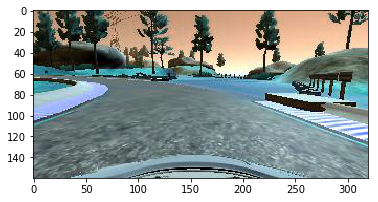

In [9]:
#print(indices)
plt.imshow(center[5])
#print(index_augmented)


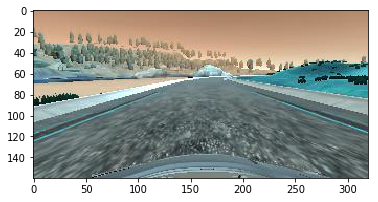

In [10]:
plt.imshow(cent_aug[58])

(array([  1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          1.30000000e+01,   1.10000000e+01,   1.40000000e+01,
          2.40000000e+01,   2.10000000e+01,   2.50000000e+01,
          2.10000000e+01,   3.70000000e+01,   7.50000000e+01,
          2.90000000e+01,   7.30000000e+01,   1.02000000e+02,
          1.02000000e+02,   5.00000000e+01,   9.20000000e+01,
          9.40000000e+01,   8.50000000e+01,   3.92000000e+02,
          3.06000000e+02,   1.98000000e+02,   1.79000000e+02,
          2.52000000e+02,   4.12000000e+02,   4.20000000e+02,
        

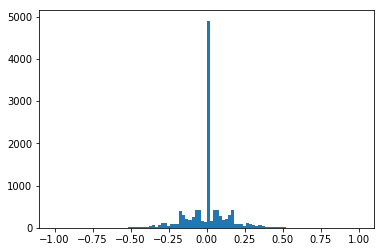

In [11]:
stk=[]
for i in range(len(index)):
    sk=float(steer[index[i]])
    stk.append(sk)
    
#plt.hist(stk,bins=100)
plt.hist(stk,bins=100)


200.0


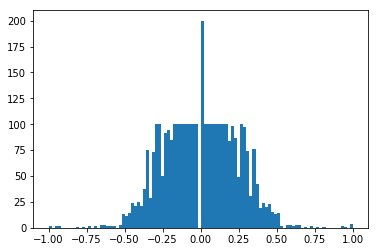

In [12]:
bin=100
check=[]
threshold=100
index_cutplus=[]
index_cutminusl=[]
index_cutminus=[]
index_cutminusk=[]


for i in range(bin*2-2):
    k=-1.02+2*i/bin
    h=-1.+2*i/bin
    counter=0
    for j in range(len(index)):
        if (float(steer[index[j]])>=k and float(steer[index[j]])<=h):
            if counter<threshold:
                check.append(index[j])
                counter+=1
                if float(steer[index[j]])>= 0.35 and float(steer[index[j]])<=0.95:
                    l=index[j]
                    index_cutplus.append(l)
                if float(steer[index[j]])<=-0.35 and float(steer[index[j]])>=-.95:
                    t=index[j]
                    index_cutminus.append(t)
                #if float(steer[index[j]])<-0.75 or float(steer[index[j]])>=-1:
                #    index_cutminusk.append(index[j])
                #if float(steer[index[j]])>0.75 or float(steer[index[j]])<=1:
                   # index_cutplusk.append(index[j])
            else:
                continue

stk=[]
for i in range(len(check)):
    sk=float(steer[check[i]])
    stk.append(sk)
    
index=check

sterr=[]
for i in range(len(check)):
    g=float(steer[check[i]])
    sterr.append(g)
    
hhh=plt.hist(sterr,bins=100)
plt.axis('on')
print(hhh[0][50])


### Shadowaugmentation by Vivek Yadav!

In [13]:
def add_random_shadow(image):
    row,cols=image.shape[0],image.shape[1]
    top_y = cols*np.random.uniform()
    top_x = 0
    bot_x = row
    bot_y = cols*np.random.uniform()
    image_hls = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    shadow_mask = 0*image_hls[:,:,1]
    X_m = np.mgrid[0:image.shape[0],0:image.shape[1]][0]
    Y_m = np.mgrid[0:image.shape[0],0:image.shape[1]][1]
    shadow_mask[((X_m-top_x)*(bot_y-top_y) -(bot_x - top_x)*(Y_m-top_y) >=0)]=1
    #random_bright = .25+.7*np.random.uniform()
    if np.random.randint(2)==1:
        random_bright = .5
        cond1 = shadow_mask==1
        cond0 = shadow_mask==0
        if np.random.randint(2)==1:
            image_hls[:,:,1][cond1] = image_hls[:,:,1][cond1]*random_bright
        else:
            image_hls[:,:,1][cond0] = image_hls[:,:,1][cond0]*random_bright    
    image = cv2.cvtColor(image_hls,cv2.COLOR_HLS2RGB)
    return image

### Image Augmentation

In [14]:
def brightness(img,steering_angle):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    scale=0.2+np.random.uniform(0,1)
    img[:,:,2]=img[:,:,2]*scale
    img=cv2.cvtColor(img,cv2.COLOR_HSV2BGR)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    steer=steering_angle
    return img, steer


def translate(img,steering_angle,tx,ty):
    
    measurement=None
    nb=None
    k=None
    
    rows,cols = img.shape[0],img.shape[1]
    nb=np.random.randint(2,size=1)
    k=np.random.randint(2,size=1)
    
    trans=tx*random.uniform(0,1)
    trans_up=ty*random.uniform(0,1)
    ## horizontally shift
    #print("nb: "+str(nb))
    
    if nb == 0:
        
        
        if k == 0:
            ## shift left
            
            M = np.float32([[1,0,-trans],[0,1,0]])
            
            measurement=float(steering_angle+(trans/cols)*1.5)
            
        if k == 1:
            ## shift right
            
            M = np.float32([[1,0,trans],[0,1,0]])
            
            measurement=float(steering_angle-(trans/cols)*1.5)
            
        #print('shift '+str(k))
        img = cv2.warpAffine(img,M,(cols,rows))

        
        ### lenkwinkeländerung eintragen
    ## vertical shift
    if nb == 1:
        
        if k == 0:
            ## shift up
            M = np.float32([[1,0,0],[0,1,trans_up]])
            
            measurement=float(steering_angle)
            
        if k == 1:
            ## shift down
            M = np.float32([[1,0,0],[0,1,-trans_up]])
            
            measurement=float(steering_angle)
            
        img = cv2.warpAffine(img,M,(cols,rows))    
    
    return img,measurement


def rot(img,steering_angle):
    rows,cols = img.shape[0],img.shape[1]
    scale=np.random.uniform(0,1)
    angle_rot=25*scale
    k=np.random.randint(low=0,high=2,size=1)
    scale=np.random.uniform(0,1)
    if k == 0:
        ## rot left
        M = cv2.getRotationMatrix2D((cols/2,rows/2),angle_rot,1)
       #        measurement=float(steering_angle+(angle_rot*8/360))

        measurement=float(steering_angle+(angle_rot*10/360))
        
    if k == 1:
        ## rot right
        M = cv2.getRotationMatrix2D((cols/2,rows/2),-angle_rot,1)
        #        measurement=float(steering_angle+(angle_rot*8/360))

        measurement=float(steering_angle-(angle_rot*10/360))
    
   
    img = cv2.warpAffine(img,M,(cols,rows))   
    return img, measurement


def crop_image(img,steering_angle):
    crop_img=img[60:140,0:360]
    res = cv2.resize(crop_img,(200, 66), interpolation = cv2.INTER_LINEAR)
    measurement=float(steering_angle)
    return res,measurement


def createIndex(index,number_of_repetition):
    ind=[]
    for i in range(len(index)):
        for k in range(number_of_repetition):
            ind.append(index[i])
            
        
    return ind

def getIndex(index,center,left,right,steer):
    ctr=[]
    lft=[]
    rght=[]
    stre=[]
    for i in range(len(index)):
    
        centerC=center[index[i]]
        leftL=left[index[i]]
        rightR=right[index[i]]
        steerr=(steer[index[i]])
    
        ctr.append(centerC)
        lft.append(leftL)
        rght.append(rightR)
        stre.append(float(steerr))
    
    center=ctr
    left=lft
    right=rght
    steer=stre
    indd=np.arange(0,len(center))
    
    return center,left,right,steer

def draw_image(index,center, left, right,steer):
    nb=np.random.randint(3,size=1)
    ## left
    if nb == 0:
        image=left[index]
        steering=float((steer[index])) + float((0.25))
    ## center    
    if nb == 1:
        image=center[index]
        steering=float(steer[index])
        
    ## right    
    if nb == 2:
        
        image=right[index]
        steering=float((steer[index])) - float((0.25))
        
    #plt.imshow(image)
    return image,steering

def pipe(img,steering_angle):
    
    imk=(translate(img,steering_angle,0,0))
    bright=brightness(imk[0],imk[1])
    shadow=add_random_shadow(bright[0])
    trans=translate(shadow,bright[1],60,30)
    rots=rot(trans[0],trans[1])
    image,steer=rots[0],rots[1]
    image,steer=crop_image(image,steer)
    return image,steer

def generator(index,center,left,right,steering_angle, batch_size=32):
    num_samples=len(index)
    np.random.shuffle(index)
    counter=0
    
    
    while 1: # Loop forever so the generator never terminates
        #np.random.shuffle(index)
        
        
        
        for offset in range(0, num_samples, batch_size):
            images = []
            angles = []
            
            batch_samples = index[offset:offset+batch_size]
            

            
            for batch_sample in batch_samples:
                
                image,angle = draw_image(batch_sample,center,left, right,steering_angle)
                img,ang=pipe(image,angle)
                
                
                images.append(img)
                angles.append(float(ang))                
                
            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)

(66, 200, 3)


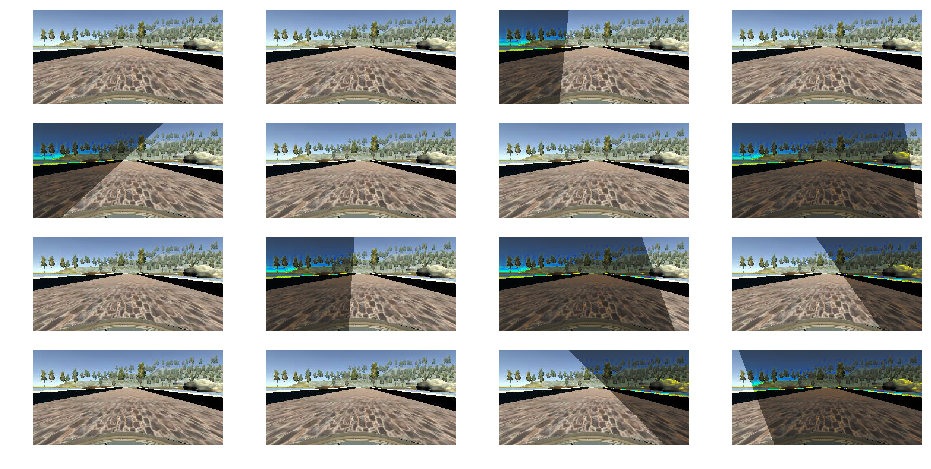

In [37]:
plt.figure(figsize=(16,8))
for i in range(16):
    image1 = add_random_shadow(center[123])
    image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
    plt.subplot(4,4,i+1)
    plt.imshow(image1)
    plt.axis('off')
print(crop_image(imgs[123],5)[0].shape)

(66, 200, 3)


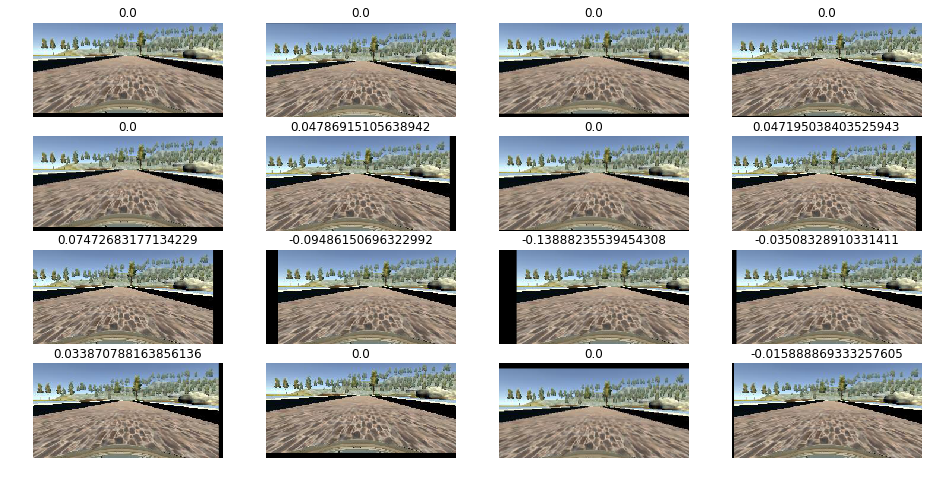

In [35]:
plt.figure(figsize=(16,8))
for i in range(16):
    imagek = translate(images[123],0,30,10)
    image1=cv2.cvtColor(imagek[0],cv2.COLOR_BGR2RGB)
    plt.subplot(4,4,i+1)
    plt.imshow(image1)
    plt.title(imagek[1])
    plt.axis('off')
print(crop_image(imgs[123],5)[0].shape)

(66, 200, 3)


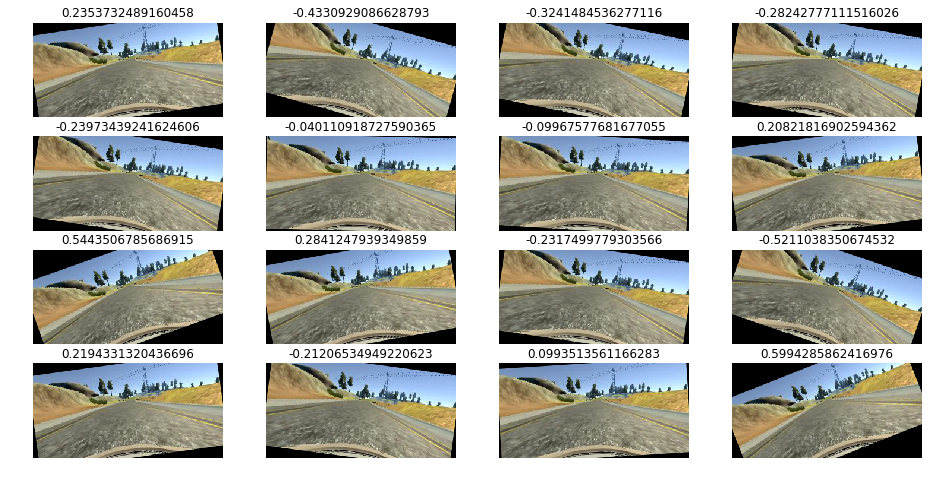

In [31]:
plt.figure(figsize=(16,8))
for i in range(16):
    imagek = rot(images[2940],0)
    image1=cv2.cvtColor(imagek[0],cv2.COLOR_BGR2RGB)
    plt.subplot(4,4,i+1)
    plt.imshow(image1)
    plt.title(str(imagek[1]))
    plt.axis('off')
print(crop_image(imgs[123],5)[0].shape)

(66, 200, 3)


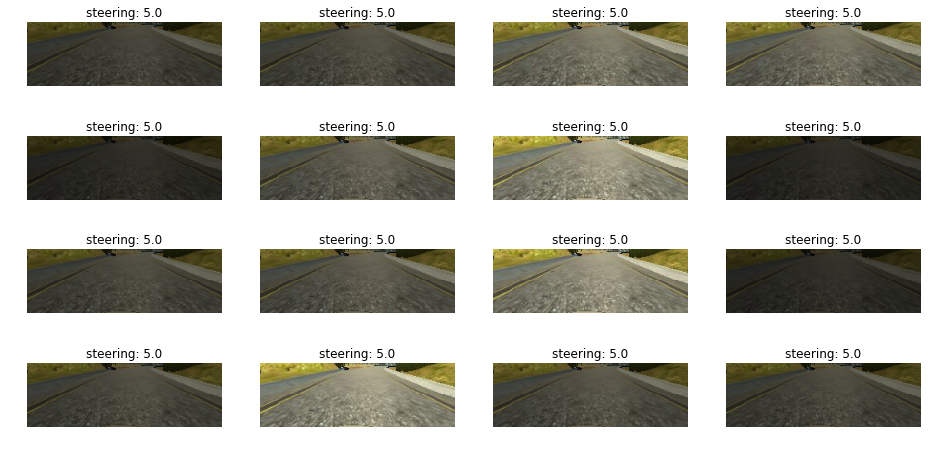

In [25]:
plt.figure(figsize=(16,8))
for i in range(16):
    image1 = crop_image(brightness(imgs[933],0)[0],brightness(imgs[123],5)[1])
    plt.subplot(4,4,i+1)
    plt.imshow(image1[0])
    plt.title("steering: "+str(image1[1]))
    plt.axis('off')
    
print(crop_image(imgs[123],5)[0].shape)

(66, 200, 3)


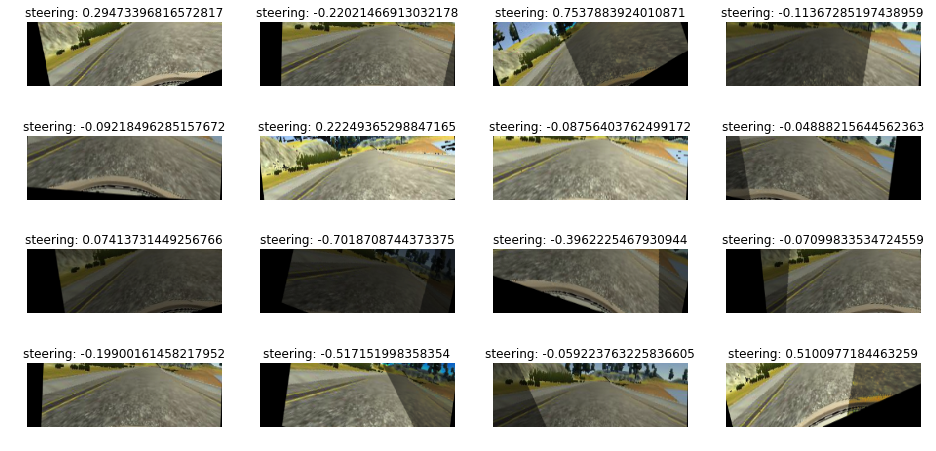

In [46]:
plt.figure(figsize=(16,8))

for i in range(16):
    image1 = pipe(imgs[553],0)
    plt.subplot(4,4,i+1)
    plt.imshow(image1[0])
    plt.title("steering: "+str(image1[1]))
    plt.axis('off')
print(image1[0].shape)



(array([   80.,     0.,    40.,    40.,    60.,   140.,   100.,   620.,
         1120.,  2500.]),
 array([-0.9426954 , -0.88383409, -0.82497278, -0.76611147, -0.70725016,
        -0.64838885, -0.58952754, -0.53066623, -0.47180492, -0.41294361,
        -0.3540823 ]),
 <a list of 10 Patch objects>)

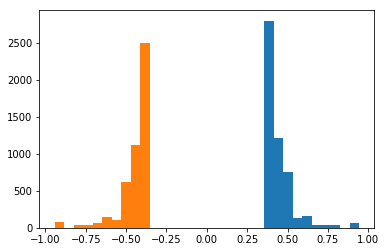

In [20]:
ind_left_aug=[]
ind_right_aug=[]
stersr=[]
plus=createIndex(index_cutplus,22)
minus=createIndex(index_cutminus,20)

for i in range(len(plus)):
    g=float(steer[plus[i]])
    ind_right_aug.append(g)

for i in range(len(minus)):
    g=float(steer[minus[i]])
    ind_left_aug.append(g)
plt.hist(ind_right_aug)
plt.hist(ind_left_aug)

In [ ]:
indexfinal=index+plus+minus
checkfinal=[]
counter=100
for i in range(bin*2-2):
    k=-1.+2*i/bin
    h=-.98+2*i/bin
    counter=0
    for j in range(len(indexfinal)):
        if (float(steer[indexfinal[j]])>=k and float(steer[indexfinal[j]])<=h):
            if counter<threshold:
                checkfinal.append(indexfinal[j])
                counter+=1
                
            else:
                continue
                
sterrrrrr=[]
for i in range(len(checkfinal)):
    g=float(steer[checkfinal[i]])
    sterrrrrr.append(g)
plt.hist(sterrrrrr,bins=100)


In [ ]:
train_index=createIndex(checkfinal,2)

In [ ]:
from sklearn.model_selection import train_test_split

train_index, valid_index= train_test_split(train_index, test_size=0.2)
for i in range(len(train_index)):
    g=float(steer[train_index[i]])
    sterr.append(g)
print(len(train_index))
plt.hist(sterr,bins=100)
print((len(train_index)/(len(train_index)+len(valid_index))))

In [ ]:
trn=getIndex(train_index,center,left,right,steer)
val=getIndex(valid_index,center,left,right,steer)
print(len(trn[3]))
plt.hist(((trn[3])),bins=100)
plt.hist(((val[3])),bins=100)

In [ ]:
train_size=len(train_index)
print(train_size)
print("valid_index percentage: "+str(len(valid_index)/(len(train_index)+len(valid_index))*100)+"%")

### NvidiaNet

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Convolution2D
# compile and train the model using the generator function
nb_batch=16
batch_size=int(train_size/nb_batch)
print(batch_size)
print(len(train_index))
print(len(valid_index))
print(len(valid_index)/batch_size)
train_generator = generator(train_index,center,left,right,steer, batch_size)
validation_generator = generator(valid_index,center,left,right,steer, batch_size)

ch, row, col = 3, 66, 200  # Trimmed image format
#ch,row,col=3,160,320
NVIDIA=Sequential()

NVIDIA.add(Lambda(lambda x: x / 255.0 - 0.5,input_shape=(row,col,ch)))

NVIDIA.add(Convolution2D(24,5,5,subsample=(2,2),init='he_normal',border_mode="valid"))

NVIDIA.add(ELU())
NVIDIA.add(Convolution2D(36,5,5,subsample=(2,2),init='he_normal',border_mode="valid"))

NVIDIA.add(ELU())
NVIDIA.add(Convolution2D(48,5,5,subsample=(2,2),init='he_normal',border_mode="valid"))

NVIDIA.add(ELU())
NVIDIA.add(Convolution2D(64,3,3,subsample=(1,1),init='he_normal',border_mode="valid"))

NVIDIA.add(ELU())
NVIDIA.add(Convolution2D(64,3,3,init='he_normal',subsample=(1,1),border_mode="valid"))
NVIDIA.add(ELU())

NVIDIA.add(Flatten())
NVIDIA.add(Dropout(0.5))
NVIDIA.add(Dense(100,init='he_normal'))
NVIDIA.add(ELU())
NVIDIA.add(Dense(50,init='he_normal'))
NVIDIA.add(ELU())
NVIDIA.add(Dense(10,init='he_normal'))
NVIDIA.add(ELU()),
NVIDIA.add(Dense(1,init='he_normal'))
NVIDIA.summary()
#exit()
# Preprocess incoming data, centered around zero with small standard deviation 



In [ ]:
adam=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
comp=NVIDIA.compile(optimizer=adam,loss='mse')
from keras.models import load_model

counters=1
model=NVIDIA.load_weights('model25.h5')
for i in range(10):
    print("You're running in loop: "+str(counters))
    
    ModelCheckpoint(filepath="model"+str(i+1)+".h5", verbose=1)
    history = NVIDIA.fit_generator(train_generator,samples_per_epoch=len(train_index), nb_epoch=3,validation_data=validation_generator,
                        nb_val_samples=len(valid_index),verbose=1)
    
    
    counters+=1
    savestate=NVIDIA.save('model'+str(i+1)+'.h5')

saveweights=NVIDIA.save_weights('model.h5')
savestate=NVIDIA.save('model.h5')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()